# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [249]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os

In [250]:
driver_path = os.path.join(os.path.expanduser("~"),"webdrivers","chromedriver.exe")
browser = Browser('chrome',service=Service(executable_path=driver_path))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [251]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [252]:
# Create a Beautiful Soup Object
html = browser.html
html_soup=soup(html, 'html.parser')
print(html_soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [253]:
# Extract all rows of data
table = html_soup.find_all(class_="data-row")
print(table)


[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

In [254]:
# Create an empty list
rowlist=[]
# Loop through the scraped data to create a list of rows
for row in table:
    rowdata={}
    data = row.find_all('td')
    rowdata['id']=data[0].text
    rowdata['terrestrial_data']=data[1].text
    rowdata['sol']=data[2].text
    rowdata['ls']=data[3].text
    rowdata['month']=data[4].text
    rowdata['min_temp']=data[5].text
    rowdata['pressure']=data[6].text
    rowlist.append(rowdata)    
    print(rowdata)


{'id': '2', 'terrestrial_data': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_data': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_data': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_data': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_data': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_data': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_data': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_data': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [255]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
tabledf = pd.DataFrame(rowlist)


In [256]:
# Confirm DataFrame was created successfully
tabledf.head()

,id,terrestrial_data,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [257]:
# Examine data type of each column
tabledf.dtypes

id                  object
terrestrial_data    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [258]:
# Change data types for data analysis
tabledf=tabledf.astype({'id':'int32'})
tabledf=tabledf.astype({'sol':'int32'})
tabledf=tabledf.astype({'ls':'int32'})
tabledf=tabledf.astype({'month':'int32'})
tabledf=tabledf.astype({'min_temp':'float'})
tabledf=tabledf.astype({'pressure':'float'})
tabledf['terrestrial_data']=pd.to_datetime(tabledf['terrestrial_data'])



In [259]:
# Confirm type changes were successful by examining data types again
tabledf.dtypes

id                           int32
terrestrial_data    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [260]:
tabledf.head()

,id,terrestrial_data,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [261]:
# 1. How many months are there on Mars?
tabledf['month'].max()

12

In [280]:
# 2. How many Martian days' worth of data are there?
i = 0
days = 0
for row in rowlist:
    if row['ls'] != i:
        days += 1
        i=row['ls']
print(days)

1012


In [263]:
# 3. What is the average low temperature by month?
averagetemp = tabledf.groupby('month',as_index =False)['min_temp'].mean()
averagetemp
print(averagetemp)


    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


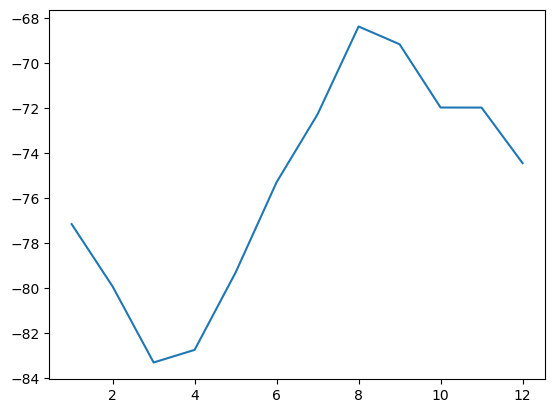

In [264]:
# Plot the average temperature by month
average_tempdf=pd.DataFrame(averagetemp)
average_tempdf
graph=plt.plot(average_tempdf['month'], average_tempdf['min_temp'])

In [265]:
# Identify the coldest and hottest months in Curiosity's location
print(average_tempdf.loc[average_tempdf['min_temp'].idxmin()])

print(average_tempdf.loc[average_tempdf['min_temp'].idxmax()])

#Month 3 is coldest, Month 8 is warmest

month        3.000000
min_temp   -83.307292
Name: 2, dtype: float64
month        8.000000
min_temp   -68.382979
Name: 7, dtype: float64


In [266]:
# 4. Average pressure by Martian month
average_pres = tabledf.groupby('month',as_index =False)['pressure'].mean()
average_pres
print(average_pres)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


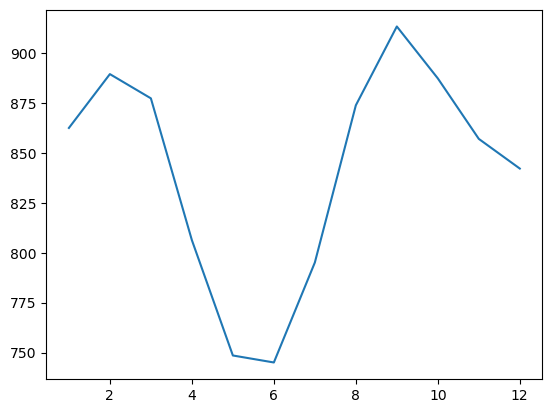

In [267]:
# Plot the average pressure by month
average_presdf=pd.DataFrame(average_pres)
average_presdf
graph=plt.plot(average_presdf['month'], average_presdf['pressure'])

In [268]:
len(tabledf['ls'].unique())

360

In [269]:
tabledf.head()


,id,terrestrial_data,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [276]:
firstdaydf=tabledf.loc[tabledf['ls']==359]
firstdaydf

,id,terrestrial_data,sol,ls,month,min_temp,pressure
302,316,2013-07-30,349,359,12,-75.0,852.0
303,318,2013-07-31,350,359,12,-76.0,853.0
923,955,2015-06-17,1017,359,12,-78.0,850.0
924,956,2015-06-18,1018,359,12,-79.0,850.0
1577,1607,2017-05-04,1686,359,12,-75.0,838.0
1578,1608,2017-05-05,1687,359,12,-75.0,838.0


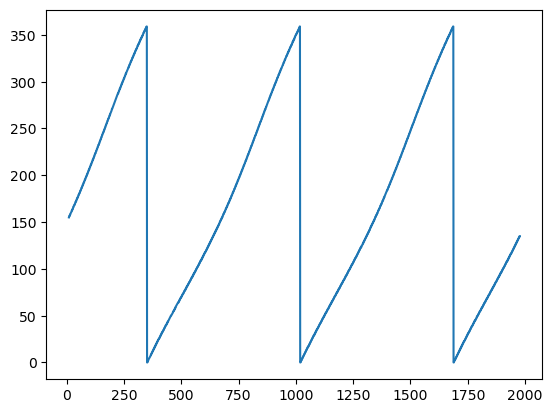

In [270]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(tabledf['sol'], tabledf['ls'])


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is 1017-349, or 668 days. A year on Mars appears to be about 668 days from the dataframe/plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [271]:
# Write the data to a CSV
tabledf.to_csv('marsdata')

In [272]:
browser.quit()